# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:05<00:00, 11.0KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

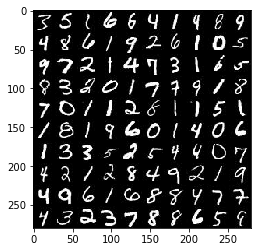

In [17]:
show_n_images = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

In [19]:
mnist_images.shape

(100, 28, 28, 1)

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

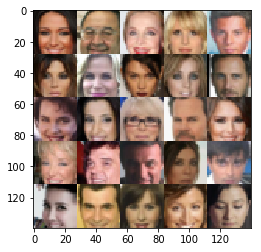

In [22]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [23]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [144]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32,shape=(None,image_width,image_height,image_channels),name='input_real')
    input_z = tf.placeholder(tf.float32,shape=(None,z_dim),name='input_z')
    lr = tf.placeholder(tf.float32)
    
    
    return input_real, input_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [ ]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        x1 = tf.layers.conv2d(images,128,5,strides=2,padding='same')
        x1 = tf.maximum(0.2*x1,x1)
        # 14*14*128
        
        x2 = tf.layers.conv2d(x1,256,5,strides=2,padding='same')
        x2 = tf.layers.batch_normalization(x2,training=True)
        x2 = tf.maximum(0.2*x2,x2)
        # 7*7*256
        
        x3 = tf.reshape(x2,(-1,7*7*256))
        logits = tf.layers.dense(x3,1)
        output = tf.sigmoid(logits)
        
    
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [ ]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        ''' 
        For this network we will send the latent noise vector through a fully connected layer and then 
        reshape it into a deep convolutional stack layer
        '''
        #(None,z_dim)
        x1 = tf.layers.dense(z, 7*7*256)
        # (None,7,7,256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2*x1, x1)

        # Now for the transpose convolutions..
        
        # (None,14,14,128)
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2*x2, x2)

        # (None,28,28,3)
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        output = tf.tanh(logits)

    return output

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [147]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z,out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model,reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [148]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    
    return d_train_opt,g_train_opt 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [149]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})
    
    

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [150]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    steps = 0 
    out_channel_dim = 1 if data_image_mode =='L' else 3
    real, z, lr = model_inputs(*data_shape[1:3],out_channel_dim,z_dim)  
    d_loss, g_loss = model_loss(real,z,out_channel_dim)
    d_train_opt , g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):        
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))
                
                _ = sess.run(d_train_opt,feed_dict={real:batch_images,z:batch_z,lr:learning_rate})
                _ = sess.run(g_train_opt,feed_dict={z:batch_z,real:batch_images,lr:learning_rate})
                
                if steps % 20 == 0:
                    train_d_loss = d_loss.eval({real:batch_images,z:batch_z})
                    train_g_loss = g_loss.eval({z:batch_z})
                    print('Epoch {}/{}'.format(epoch_i+1,epoch_count),end='...')
                    print("Discriminator Loss: {:.4f}...".format(train_d_loss),end='...')
                    print("Generator Loss: {:.4f}".format(train_g_loss))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 16, z, out_channel_dim, data_image_mode)
        print('='*11+'done'+'='*11)
                
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2...Discriminator Loss: 0.6218......Generator Loss: 18.5544
Epoch 0/2...Discriminator Loss: 1.0962......Generator Loss: 7.5054
Epoch 0/2...Discriminator Loss: 0.3181......Generator Loss: 3.0325
Epoch 0/2...Discriminator Loss: 0.9495......Generator Loss: 1.3729
Epoch 0/2...Discriminator Loss: 2.8003......Generator Loss: 0.3250
Epoch 0/2...Discriminator Loss: 1.7858......Generator Loss: 0.5317
Epoch 0/2...Discriminator Loss: 0.1508......Generator Loss: 3.1739
Epoch 0/2...Discriminator Loss: 1.8129......Generator Loss: 12.5165
Epoch 0/2...Discriminator Loss: 0.7907......Generator Loss: 0.9876
Epoch 0/2...Discriminator Loss: 0.1109......Generator Loss: 3.8360


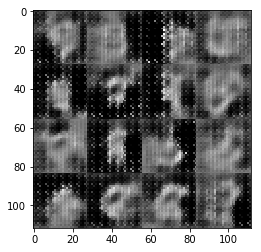

Epoch 0/2...Discriminator Loss: 0.0309......Generator Loss: 4.7024
Epoch 0/2...Discriminator Loss: 0.0179......Generator Loss: 5.9877
Epoch 0/2...Discriminator Loss: 0.2223......Generator Loss: 3.0051
Epoch 0/2...Discriminator Loss: 3.0924......Generator Loss: 7.7204
Epoch 0/2...Discriminator Loss: 0.4929......Generator Loss: 1.7980
Epoch 0/2...Discriminator Loss: 0.1389......Generator Loss: 4.4346
Epoch 0/2...Discriminator Loss: 0.5426......Generator Loss: 8.1772
Epoch 0/2...Discriminator Loss: 0.1119......Generator Loss: 6.1074
Epoch 0/2...Discriminator Loss: 0.2083......Generator Loss: 2.8255
Epoch 0/2...Discriminator Loss: 0.0357......Generator Loss: 5.7058


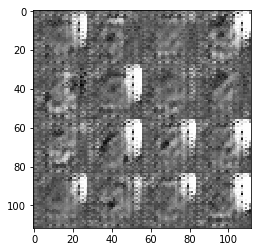

Epoch 0/2...Discriminator Loss: 0.1485......Generator Loss: 4.0750
Epoch 0/2...Discriminator Loss: 0.5928......Generator Loss: 8.3906
Epoch 0/2...Discriminator Loss: 6.4863......Generator Loss: 17.3027
Epoch 0/2...Discriminator Loss: 0.3923......Generator Loss: 3.5398
Epoch 0/2...Discriminator Loss: 1.9032......Generator Loss: 0.8711
Epoch 0/2...Discriminator Loss: 2.8219......Generator Loss: 0.1461
Epoch 0/2...Discriminator Loss: 1.2146......Generator Loss: 1.4195
Epoch 0/2...Discriminator Loss: 1.2978......Generator Loss: 3.7732
Epoch 0/2...Discriminator Loss: 0.3124......Generator Loss: 4.4941
Epoch 0/2...Discriminator Loss: 0.4899......Generator Loss: 4.3765


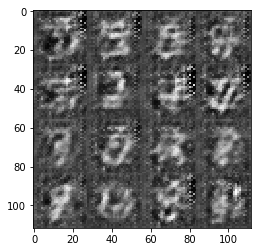

Epoch 0/2...Discriminator Loss: 1.5215......Generator Loss: 1.7025
Epoch 0/2...Discriminator Loss: 0.7502......Generator Loss: 8.7414
Epoch 0/2...Discriminator Loss: 5.4649......Generator Loss: 8.3537
Epoch 0/2...Discriminator Loss: 2.2862......Generator Loss: 0.2803
Epoch 0/2...Discriminator Loss: 0.5862......Generator Loss: 1.7409
Epoch 0/2...Discriminator Loss: 0.7847......Generator Loss: 1.2529
Epoch 0/2...Discriminator Loss: 0.2033......Generator Loss: 4.1038
Epoch 0/2...Discriminator Loss: 1.1844......Generator Loss: 6.3798
Epoch 0/2...Discriminator Loss: 2.3071......Generator Loss: 0.1542
Epoch 0/2...Discriminator Loss: 0.5519......Generator Loss: 2.6876


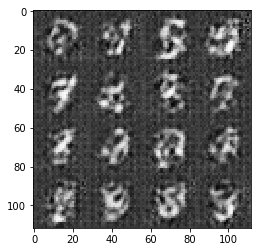

Epoch 0/2...Discriminator Loss: 0.3606......Generator Loss: 1.6181
Epoch 0/2...Discriminator Loss: 1.3570......Generator Loss: 0.4234
Epoch 0/2...Discriminator Loss: 2.2066......Generator Loss: 0.1899
Epoch 0/2...Discriminator Loss: 0.7902......Generator Loss: 0.9109
Epoch 0/2...Discriminator Loss: 0.4044......Generator Loss: 1.5764
Epoch 0/2...Discriminator Loss: 0.3743......Generator Loss: 1.5511
Epoch 1/2...Discriminator Loss: 0.3241......Generator Loss: 1.5757
Epoch 1/2...Discriminator Loss: 0.6114......Generator Loss: 1.0095
Epoch 1/2...Discriminator Loss: 0.2999......Generator Loss: 2.1262
Epoch 1/2...Discriminator Loss: 0.2895......Generator Loss: 1.8020


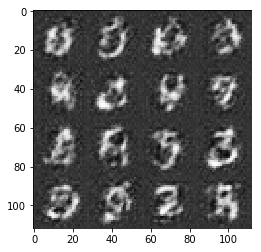

Epoch 1/2...Discriminator Loss: 0.1602......Generator Loss: 2.8678
Epoch 1/2...Discriminator Loss: 0.1472......Generator Loss: 3.4041
Epoch 1/2...Discriminator Loss: 0.1810......Generator Loss: 3.3556
Epoch 1/2...Discriminator Loss: 3.8310......Generator Loss: 7.9429
Epoch 1/2...Discriminator Loss: 0.3587......Generator Loss: 1.7900
Epoch 1/2...Discriminator Loss: 0.2820......Generator Loss: 3.5126
Epoch 1/2...Discriminator Loss: 0.1635......Generator Loss: 2.5284
Epoch 1/2...Discriminator Loss: 0.1521......Generator Loss: 2.6614
Epoch 1/2...Discriminator Loss: 0.1410......Generator Loss: 2.6636
Epoch 1/2...Discriminator Loss: 0.0871......Generator Loss: 3.3712


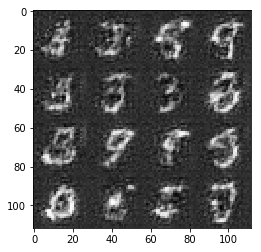

Epoch 1/2...Discriminator Loss: 0.1947......Generator Loss: 2.2065
Epoch 1/2...Discriminator Loss: 0.1090......Generator Loss: 4.0585
Epoch 1/2...Discriminator Loss: 0.1866......Generator Loss: 2.1808
Epoch 1/2...Discriminator Loss: 0.0817......Generator Loss: 3.2755
Epoch 1/2...Discriminator Loss: 0.3048......Generator Loss: 1.7988
Epoch 1/2...Discriminator Loss: 3.5905......Generator Loss: 0.0723
Epoch 1/2...Discriminator Loss: 1.5155......Generator Loss: 0.4872
Epoch 1/2...Discriminator Loss: 2.9483......Generator Loss: 4.7230
Epoch 1/2...Discriminator Loss: 0.3606......Generator Loss: 1.9411
Epoch 1/2...Discriminator Loss: 0.3412......Generator Loss: 2.5151


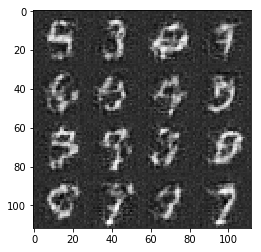

Epoch 1/2...Discriminator Loss: 0.2806......Generator Loss: 2.0633
Epoch 1/2...Discriminator Loss: 0.4999......Generator Loss: 1.1582
Epoch 1/2...Discriminator Loss: 0.2506......Generator Loss: 2.3169
Epoch 1/2...Discriminator Loss: 0.2330......Generator Loss: 1.9759
Epoch 1/2...Discriminator Loss: 0.1446......Generator Loss: 2.5463
Epoch 1/2...Discriminator Loss: 0.1292......Generator Loss: 2.9414
Epoch 1/2...Discriminator Loss: 0.0894......Generator Loss: 4.3236
Epoch 1/2...Discriminator Loss: 0.0975......Generator Loss: 2.9921
Epoch 1/2...Discriminator Loss: 0.3245......Generator Loss: 1.5692
Epoch 1/2...Discriminator Loss: 0.1313......Generator Loss: 3.3390


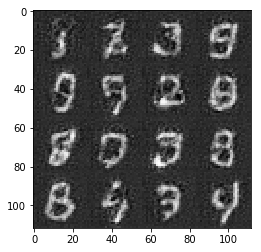

Epoch 1/2...Discriminator Loss: 0.1028......Generator Loss: 2.9942
Epoch 1/2...Discriminator Loss: 0.0556......Generator Loss: 3.9818
Epoch 1/2...Discriminator Loss: 7.4239......Generator Loss: 8.2757
Epoch 1/2...Discriminator Loss: 1.4436......Generator Loss: 3.9888
Epoch 1/2...Discriminator Loss: 1.2455......Generator Loss: 3.2433
Epoch 1/2...Discriminator Loss: 1.2768......Generator Loss: 3.7192
Epoch 1/2...Discriminator Loss: 0.6117......Generator Loss: 1.8506
Epoch 1/2...Discriminator Loss: 0.5562......Generator Loss: 1.6498
Epoch 1/2...Discriminator Loss: 0.7958......Generator Loss: 0.7934
Epoch 1/2...Discriminator Loss: 0.7837......Generator Loss: 0.8249


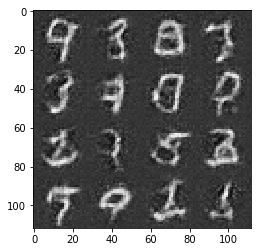

Epoch 1/2...Discriminator Loss: 0.5955......Generator Loss: 1.0629
Epoch 1/2...Discriminator Loss: 0.4456......Generator Loss: 1.3665
Epoch 1/2...Discriminator Loss: 0.5343......Generator Loss: 1.0949


In [137]:
batch_size = 128
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1...Discriminator Loss: 0.2736......Generator Loss: 2.8494
Epoch 1/1...Discriminator Loss: 0.0588......Generator Loss: 6.2224
Epoch 1/1...Discriminator Loss: 0.0248......Generator Loss: 5.7000
Epoch 1/1...Discriminator Loss: 2.9888......Generator Loss: 0.2773
Epoch 1/1...Discriminator Loss: 0.5982......Generator Loss: 2.2148


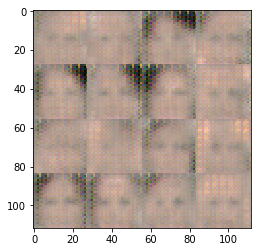

Epoch 1/1...Discriminator Loss: 0.3860......Generator Loss: 7.6357
Epoch 1/1...Discriminator Loss: 0.4546......Generator Loss: 1.8094
Epoch 1/1...Discriminator Loss: 0.2129......Generator Loss: 2.5539
Epoch 1/1...Discriminator Loss: 2.1184......Generator Loss: 0.7362
Epoch 1/1...Discriminator Loss: 0.4309......Generator Loss: 6.1011


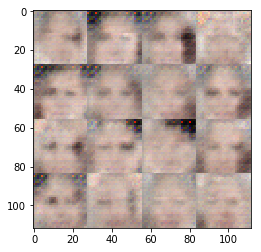

Epoch 1/1...Discriminator Loss: 0.0495......Generator Loss: 6.1086
Epoch 1/1...Discriminator Loss: 1.1065......Generator Loss: 1.1399
Epoch 1/1...Discriminator Loss: 1.8388......Generator Loss: 0.3305
Epoch 1/1...Discriminator Loss: 0.0960......Generator Loss: 6.1054
Epoch 1/1...Discriminator Loss: 0.9583......Generator Loss: 0.7586


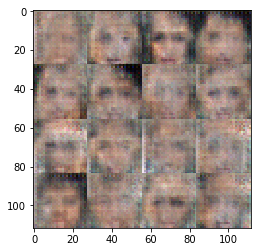

Epoch 1/1...Discriminator Loss: 1.0072......Generator Loss: 0.9065
Epoch 1/1...Discriminator Loss: 0.0618......Generator Loss: 8.0048
Epoch 1/1...Discriminator Loss: 0.0559......Generator Loss: 10.3931
Epoch 1/1...Discriminator Loss: 0.1184......Generator Loss: 7.7028
Epoch 1/1...Discriminator Loss: 0.3076......Generator Loss: 3.5208


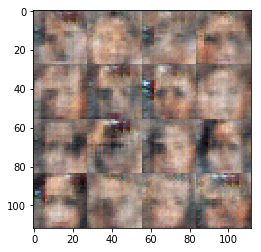

Epoch 1/1...Discriminator Loss: 2.8214......Generator Loss: 7.4793
Epoch 1/1...Discriminator Loss: 1.2417......Generator Loss: 1.1653
Epoch 1/1...Discriminator Loss: 4.6206......Generator Loss: 9.9803
Epoch 1/1...Discriminator Loss: 0.2950......Generator Loss: 3.3924
Epoch 1/1...Discriminator Loss: 2.0930......Generator Loss: 5.1125


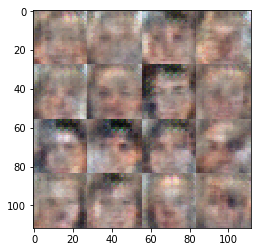

Epoch 1/1...Discriminator Loss: 2.6495......Generator Loss: 4.2528
Epoch 1/1...Discriminator Loss: 0.0631......Generator Loss: 11.4632
Epoch 1/1...Discriminator Loss: 0.2666......Generator Loss: 7.5617
Epoch 1/1...Discriminator Loss: 0.5937......Generator Loss: 5.5792
Epoch 1/1...Discriminator Loss: 1.1734......Generator Loss: 1.0770


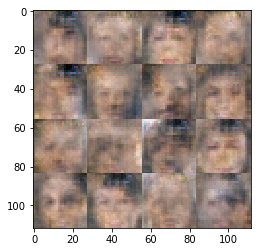

Epoch 1/1...Discriminator Loss: 1.3807......Generator Loss: 9.6003
Epoch 1/1...Discriminator Loss: 2.5986......Generator Loss: 0.2686
Epoch 1/1...Discriminator Loss: 0.7208......Generator Loss: 6.7031
Epoch 1/1...Discriminator Loss: 0.8346......Generator Loss: 3.9479
Epoch 1/1...Discriminator Loss: 1.6475......Generator Loss: 2.9371


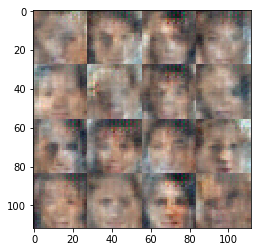

Epoch 1/1...Discriminator Loss: 0.2983......Generator Loss: 5.8466
Epoch 1/1...Discriminator Loss: 1.2970......Generator Loss: 0.8131
Epoch 1/1...Discriminator Loss: 1.9808......Generator Loss: 0.4879
Epoch 1/1...Discriminator Loss: 0.6502......Generator Loss: 1.9545
Epoch 1/1...Discriminator Loss: 0.1920......Generator Loss: 3.9199


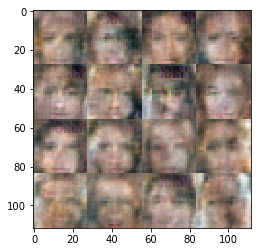

Epoch 1/1...Discriminator Loss: 0.4132......Generator Loss: 3.2681
Epoch 1/1...Discriminator Loss: 2.0068......Generator Loss: 0.2026
Epoch 1/1...Discriminator Loss: 2.2652......Generator Loss: 0.3592
Epoch 1/1...Discriminator Loss: 1.0854......Generator Loss: 3.0786
Epoch 1/1...Discriminator Loss: 2.8444......Generator Loss: 0.1143


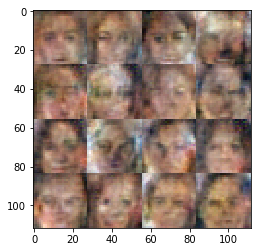

Epoch 1/1...Discriminator Loss: 0.8201......Generator Loss: 2.0146
Epoch 1/1...Discriminator Loss: 0.9574......Generator Loss: 1.0039
Epoch 1/1...Discriminator Loss: 0.4723......Generator Loss: 1.7549
Epoch 1/1...Discriminator Loss: 1.3595......Generator Loss: 0.4784
Epoch 1/1...Discriminator Loss: 0.7096......Generator Loss: 2.4974


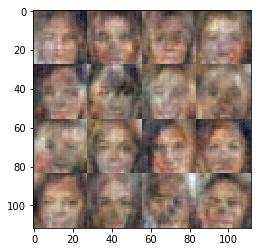

Epoch 1/1...Discriminator Loss: 0.4703......Generator Loss: 2.0293
Epoch 1/1...Discriminator Loss: 1.7841......Generator Loss: 0.4648
Epoch 1/1...Discriminator Loss: 0.6739......Generator Loss: 2.1563
Epoch 1/1...Discriminator Loss: 1.3206......Generator Loss: 0.5081
Epoch 1/1...Discriminator Loss: 0.4728......Generator Loss: 2.8400


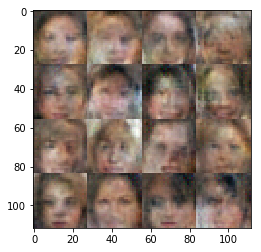

Epoch 1/1...Discriminator Loss: 0.7705......Generator Loss: 1.3689
Epoch 1/1...Discriminator Loss: 0.4073......Generator Loss: 1.8992
Epoch 1/1...Discriminator Loss: 0.6011......Generator Loss: 2.6094
Epoch 1/1...Discriminator Loss: 0.9484......Generator Loss: 0.6945
Epoch 1/1...Discriminator Loss: 0.7598......Generator Loss: 0.9902


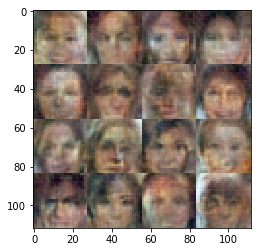

Epoch 1/1...Discriminator Loss: 0.8993......Generator Loss: 1.1696
Epoch 1/1...Discriminator Loss: 0.9457......Generator Loss: 0.9661
Epoch 1/1...Discriminator Loss: 0.3749......Generator Loss: 2.0867
Epoch 1/1...Discriminator Loss: 0.5967......Generator Loss: 2.1806
Epoch 1/1...Discriminator Loss: 0.8710......Generator Loss: 0.9458


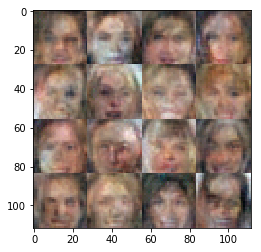

Epoch 1/1...Discriminator Loss: 0.5431......Generator Loss: 2.5943
Epoch 1/1...Discriminator Loss: 1.1461......Generator Loss: 0.8200
Epoch 1/1...Discriminator Loss: 1.4744......Generator Loss: 0.4057
Epoch 1/1...Discriminator Loss: 0.9003......Generator Loss: 1.1589
Epoch 1/1...Discriminator Loss: 1.2107......Generator Loss: 0.5366


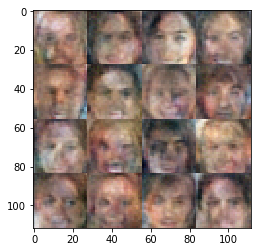

Epoch 1/1...Discriminator Loss: 1.0261......Generator Loss: 0.6912
Epoch 1/1...Discriminator Loss: 1.0805......Generator Loss: 1.0021
Epoch 1/1...Discriminator Loss: 1.3188......Generator Loss: 1.0444
Epoch 1/1...Discriminator Loss: 0.9867......Generator Loss: 0.8023
Epoch 1/1...Discriminator Loss: 1.0527......Generator Loss: 1.2000


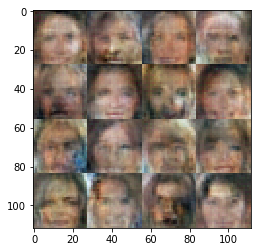

Epoch 1/1...Discriminator Loss: 0.7874......Generator Loss: 1.3686
Epoch 1/1...Discriminator Loss: 1.1138......Generator Loss: 0.8308
Epoch 1/1...Discriminator Loss: 1.1988......Generator Loss: 0.7848
Epoch 1/1...Discriminator Loss: 1.0987......Generator Loss: 0.7376
Epoch 1/1...Discriminator Loss: 2.0838......Generator Loss: 0.1597


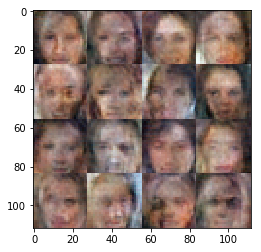

Epoch 1/1...Discriminator Loss: 1.2134......Generator Loss: 1.4321
Epoch 1/1...Discriminator Loss: 1.3509......Generator Loss: 0.4391
Epoch 1/1...Discriminator Loss: 1.2091......Generator Loss: 0.7010
Epoch 1/1...Discriminator Loss: 1.1453......Generator Loss: 0.8231
Epoch 1/1...Discriminator Loss: 1.3230......Generator Loss: 2.1236


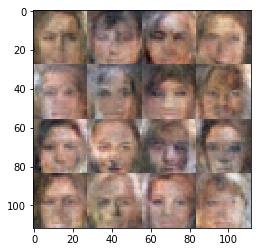

Epoch 1/1...Discriminator Loss: 0.7920......Generator Loss: 1.0751
Epoch 1/1...Discriminator Loss: 1.2740......Generator Loss: 0.6851
Epoch 1/1...Discriminator Loss: 1.0135......Generator Loss: 0.7836
Epoch 1/1...Discriminator Loss: 1.2073......Generator Loss: 0.7425
Epoch 1/1...Discriminator Loss: 0.9570......Generator Loss: 0.8379


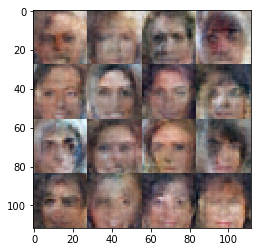

Epoch 1/1...Discriminator Loss: 1.2976......Generator Loss: 0.6074
Epoch 1/1...Discriminator Loss: 0.9223......Generator Loss: 0.9289
Epoch 1/1...Discriminator Loss: 1.6673......Generator Loss: 0.3267
Epoch 1/1...Discriminator Loss: 1.0651......Generator Loss: 0.9722
Epoch 1/1...Discriminator Loss: 0.9974......Generator Loss: 1.4096


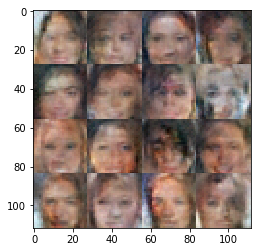

Epoch 1/1...Discriminator Loss: 1.1268......Generator Loss: 0.7158
Epoch 1/1...Discriminator Loss: 1.0932......Generator Loss: 0.7186
Epoch 1/1...Discriminator Loss: 0.9646......Generator Loss: 1.4610
Epoch 1/1...Discriminator Loss: 1.2379......Generator Loss: 0.8870
Epoch 1/1...Discriminator Loss: 1.2974......Generator Loss: 0.7016


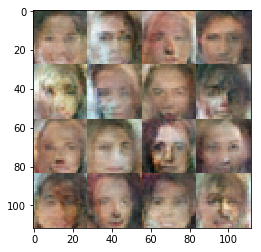

Epoch 1/1...Discriminator Loss: 1.3011......Generator Loss: 0.5752
Epoch 1/1...Discriminator Loss: 1.5892......Generator Loss: 0.3439
Epoch 1/1...Discriminator Loss: 0.9305......Generator Loss: 1.0299
Epoch 1/1...Discriminator Loss: 1.1133......Generator Loss: 0.7208
Epoch 1/1...Discriminator Loss: 2.0302......Generator Loss: 0.6600


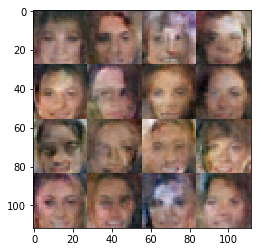

Epoch 1/1...Discriminator Loss: 1.5616......Generator Loss: 0.3814
Epoch 1/1...Discriminator Loss: 1.1590......Generator Loss: 0.8903
Epoch 1/1...Discriminator Loss: 1.0239......Generator Loss: 0.7338
Epoch 1/1...Discriminator Loss: 1.1071......Generator Loss: 0.5976
Epoch 1/1...Discriminator Loss: 0.7251......Generator Loss: 1.2853


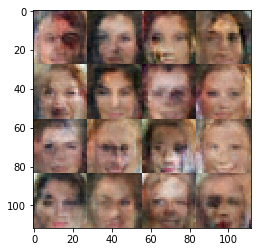

Epoch 1/1...Discriminator Loss: 1.6620......Generator Loss: 0.3123
Epoch 1/1...Discriminator Loss: 1.1645......Generator Loss: 1.1690
Epoch 1/1...Discriminator Loss: 1.0731......Generator Loss: 0.7472
Epoch 1/1...Discriminator Loss: 0.9247......Generator Loss: 1.3742
Epoch 1/1...Discriminator Loss: 1.6559......Generator Loss: 1.7833


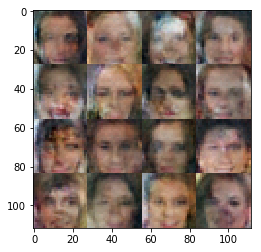

Epoch 1/1...Discriminator Loss: 1.3718......Generator Loss: 0.8654
Epoch 1/1...Discriminator Loss: 1.4307......Generator Loss: 0.4491
Epoch 1/1...Discriminator Loss: 1.4402......Generator Loss: 0.6135
Epoch 1/1...Discriminator Loss: 1.2345......Generator Loss: 0.4883
Epoch 1/1...Discriminator Loss: 1.0725......Generator Loss: 0.6800


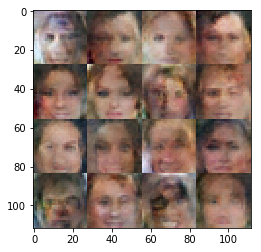

Epoch 1/1...Discriminator Loss: 1.1820......Generator Loss: 0.5226
Epoch 1/1...Discriminator Loss: 0.9133......Generator Loss: 0.9549
Epoch 1/1...Discriminator Loss: 1.3031......Generator Loss: 1.5020
Epoch 1/1...Discriminator Loss: 2.2814......Generator Loss: 0.6068
Epoch 1/1...Discriminator Loss: 1.5500......Generator Loss: 1.6329


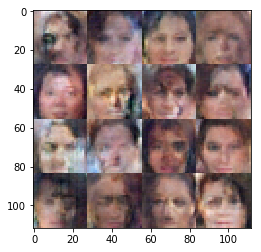

Epoch 1/1...Discriminator Loss: 1.0462......Generator Loss: 1.3178
Epoch 1/1...Discriminator Loss: 1.0379......Generator Loss: 0.9610
Epoch 1/1...Discriminator Loss: 1.2240......Generator Loss: 1.3505
Epoch 1/1...Discriminator Loss: 0.9931......Generator Loss: 1.0858
Epoch 1/1...Discriminator Loss: 0.7846......Generator Loss: 1.3507


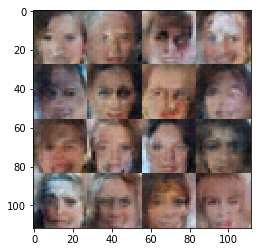

Epoch 1/1...Discriminator Loss: 1.2478......Generator Loss: 0.5917
Epoch 1/1...Discriminator Loss: 1.1056......Generator Loss: 1.3221
Epoch 1/1...Discriminator Loss: 1.1683......Generator Loss: 1.7458
Epoch 1/1...Discriminator Loss: 1.2763......Generator Loss: 0.7855
Epoch 1/1...Discriminator Loss: 1.3665......Generator Loss: 0.4780


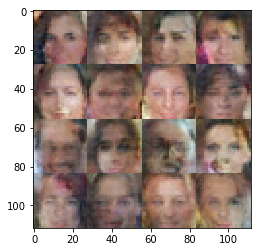

Epoch 1/1...Discriminator Loss: 1.6129......Generator Loss: 1.1205
Epoch 1/1...Discriminator Loss: 1.0015......Generator Loss: 0.8142
Epoch 1/1...Discriminator Loss: 1.4744......Generator Loss: 0.4899
Epoch 1/1...Discriminator Loss: 1.2230......Generator Loss: 1.6510
Epoch 1/1...Discriminator Loss: 1.2142......Generator Loss: 0.7851


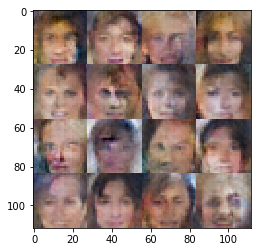

Epoch 1/1...Discriminator Loss: 1.4056......Generator Loss: 0.3573
Epoch 1/1...Discriminator Loss: 1.1117......Generator Loss: 0.6888
Epoch 1/1...Discriminator Loss: 1.8062......Generator Loss: 1.8025
Epoch 1/1...Discriminator Loss: 1.3751......Generator Loss: 0.7349
Epoch 1/1...Discriminator Loss: 1.3902......Generator Loss: 0.5984


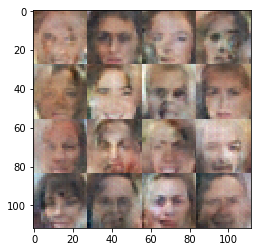

Epoch 1/1...Discriminator Loss: 0.9793......Generator Loss: 1.3126
Epoch 1/1...Discriminator Loss: 1.3002......Generator Loss: 0.5373
Epoch 1/1...Discriminator Loss: 0.9822......Generator Loss: 0.9672
Epoch 1/1...Discriminator Loss: 1.4623......Generator Loss: 0.3889
Epoch 1/1...Discriminator Loss: 1.3579......Generator Loss: 1.1390


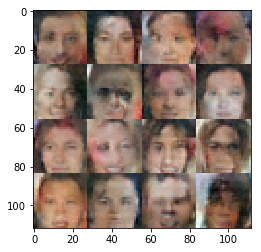

Epoch 1/1...Discriminator Loss: 1.1666......Generator Loss: 0.8205
Epoch 1/1...Discriminator Loss: 1.1125......Generator Loss: 1.2033
Epoch 1/1...Discriminator Loss: 1.1539......Generator Loss: 0.8303
Epoch 1/1...Discriminator Loss: 1.3241......Generator Loss: 0.6702
Epoch 1/1...Discriminator Loss: 1.0411......Generator Loss: 0.8214


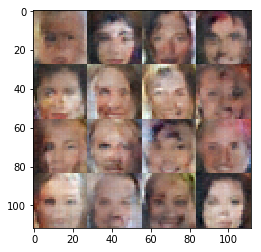

Epoch 1/1...Discriminator Loss: 0.8032......Generator Loss: 1.4451
Epoch 1/1...Discriminator Loss: 1.1841......Generator Loss: 1.0403
Epoch 1/1...Discriminator Loss: 1.0536......Generator Loss: 1.0820
Epoch 1/1...Discriminator Loss: 1.0343......Generator Loss: 0.6609
Epoch 1/1...Discriminator Loss: 1.0544......Generator Loss: 1.0257


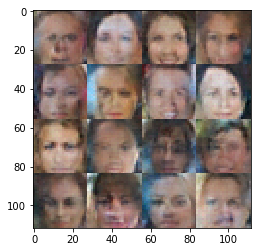

Epoch 1/1...Discriminator Loss: 1.8612......Generator Loss: 0.2656
Epoch 1/1...Discriminator Loss: 1.3638......Generator Loss: 0.4924
Epoch 1/1...Discriminator Loss: 1.6244......Generator Loss: 0.6817
Epoch 1/1...Discriminator Loss: 1.1544......Generator Loss: 1.0942
Epoch 1/1...Discriminator Loss: 1.2372......Generator Loss: 1.6355


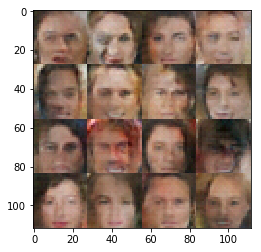

Epoch 1/1...Discriminator Loss: 1.1487......Generator Loss: 1.1301
Epoch 1/1...Discriminator Loss: 1.2889......Generator Loss: 0.8610
Epoch 1/1...Discriminator Loss: 0.8446......Generator Loss: 1.3702
Epoch 1/1...Discriminator Loss: 1.3629......Generator Loss: 0.5355
Epoch 1/1...Discriminator Loss: 1.6556......Generator Loss: 2.6047


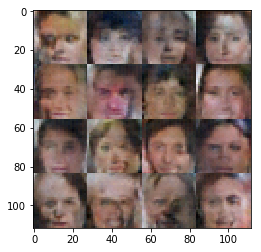

Epoch 1/1...Discriminator Loss: 1.4750......Generator Loss: 0.4343
Epoch 1/1...Discriminator Loss: 1.2307......Generator Loss: 0.5271
Epoch 1/1...Discriminator Loss: 0.7387......Generator Loss: 1.3081
Epoch 1/1...Discriminator Loss: 2.2337......Generator Loss: 0.2555
Epoch 1/1...Discriminator Loss: 1.8742......Generator Loss: 0.2723


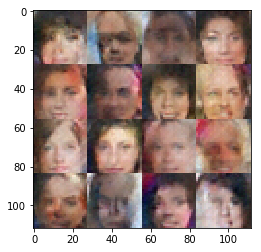

Epoch 1/1...Discriminator Loss: 1.6209......Generator Loss: 0.8927
Epoch 1/1...Discriminator Loss: 0.9836......Generator Loss: 1.4985
Epoch 1/1...Discriminator Loss: 0.8842......Generator Loss: 0.9800
Epoch 1/1...Discriminator Loss: 1.7578......Generator Loss: 0.3048
Epoch 1/1...Discriminator Loss: 1.1867......Generator Loss: 1.0522


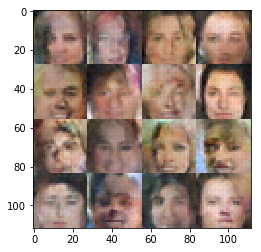

Epoch 1/1...Discriminator Loss: 1.3294......Generator Loss: 0.6694
Epoch 1/1...Discriminator Loss: 1.1689......Generator Loss: 1.2944
Epoch 1/1...Discriminator Loss: 0.9979......Generator Loss: 1.0688
Epoch 1/1...Discriminator Loss: 0.8661......Generator Loss: 1.0513
Epoch 1/1...Discriminator Loss: 1.1164......Generator Loss: 0.6485


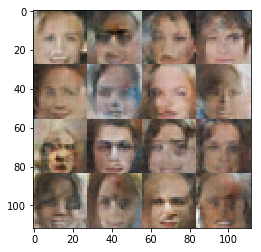

Epoch 1/1...Discriminator Loss: 0.9905......Generator Loss: 1.3671
Epoch 1/1...Discriminator Loss: 1.0342......Generator Loss: 1.0760
Epoch 1/1...Discriminator Loss: 2.2250......Generator Loss: 3.1171
Epoch 1/1...Discriminator Loss: 1.1161......Generator Loss: 0.6960
Epoch 1/1...Discriminator Loss: 1.2797......Generator Loss: 0.6771


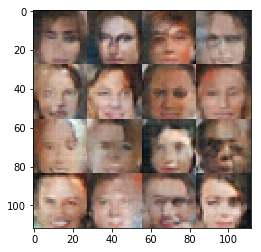

Epoch 1/1...Discriminator Loss: 0.9705......Generator Loss: 0.9193
Epoch 1/1...Discriminator Loss: 1.4360......Generator Loss: 0.4188
Epoch 1/1...Discriminator Loss: 0.7529......Generator Loss: 1.3308
Epoch 1/1...Discriminator Loss: 1.3785......Generator Loss: 1.3668
Epoch 1/1...Discriminator Loss: 1.4245......Generator Loss: 0.5361


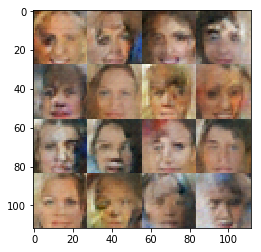

Epoch 1/1...Discriminator Loss: 1.2969......Generator Loss: 1.4226
Epoch 1/1...Discriminator Loss: 1.2044......Generator Loss: 0.7076
Epoch 1/1...Discriminator Loss: 0.8179......Generator Loss: 1.8233
Epoch 1/1...Discriminator Loss: 1.2720......Generator Loss: 0.5311
Epoch 1/1...Discriminator Loss: 1.1400......Generator Loss: 0.5802


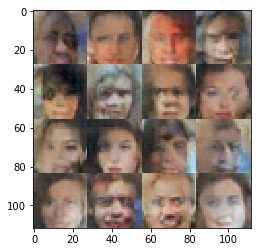

Epoch 1/1...Discriminator Loss: 1.4787......Generator Loss: 0.8767
Epoch 1/1...Discriminator Loss: 1.2111......Generator Loss: 1.2715
Epoch 1/1...Discriminator Loss: 1.3843......Generator Loss: 0.4161
Epoch 1/1...Discriminator Loss: 0.9620......Generator Loss: 1.0253
Epoch 1/1...Discriminator Loss: 1.3141......Generator Loss: 0.6962


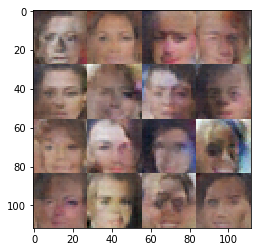

Epoch 1/1...Discriminator Loss: 1.5478......Generator Loss: 0.3393
Epoch 1/1...Discriminator Loss: 1.4312......Generator Loss: 0.3856
Epoch 1/1...Discriminator Loss: 1.2913......Generator Loss: 0.6411
Epoch 1/1...Discriminator Loss: 1.0981......Generator Loss: 0.6269
Epoch 1/1...Discriminator Loss: 1.5198......Generator Loss: 1.7846


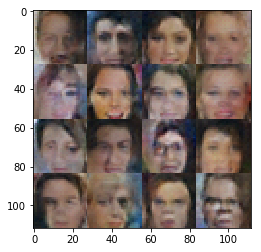

Epoch 1/1...Discriminator Loss: 1.0445......Generator Loss: 1.0001
Epoch 1/1...Discriminator Loss: 1.2747......Generator Loss: 0.6017
Epoch 1/1...Discriminator Loss: 1.7787......Generator Loss: 0.2807
Epoch 1/1...Discriminator Loss: 1.4546......Generator Loss: 0.3821
Epoch 1/1...Discriminator Loss: 1.9965......Generator Loss: 0.2437


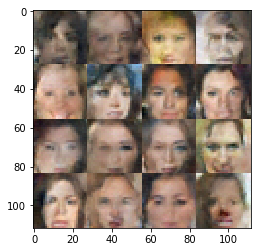

Epoch 1/1...Discriminator Loss: 1.4230......Generator Loss: 0.3713
Epoch 1/1...Discriminator Loss: 1.2507......Generator Loss: 0.5407
Epoch 1/1...Discriminator Loss: 0.8949......Generator Loss: 1.0155
Epoch 1/1...Discriminator Loss: 1.3329......Generator Loss: 0.4805
Epoch 1/1...Discriminator Loss: 1.5698......Generator Loss: 0.3659


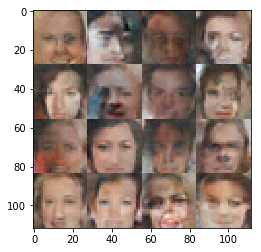

Epoch 1/1...Discriminator Loss: 1.4116......Generator Loss: 0.7976
Epoch 1/1...Discriminator Loss: 1.0741......Generator Loss: 1.3854
Epoch 1/1...Discriminator Loss: 1.1346......Generator Loss: 0.9038
Epoch 1/1...Discriminator Loss: 1.2600......Generator Loss: 0.9066
Epoch 1/1...Discriminator Loss: 0.7315......Generator Loss: 1.3185


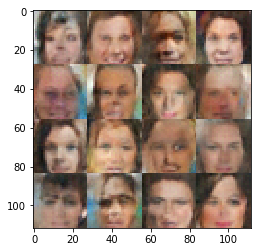

Epoch 1/1...Discriminator Loss: 0.9983......Generator Loss: 1.1564
Epoch 1/1...Discriminator Loss: 1.3943......Generator Loss: 0.5270
Epoch 1/1...Discriminator Loss: 1.3188......Generator Loss: 1.0007
Epoch 1/1...Discriminator Loss: 1.4288......Generator Loss: 0.4301
Epoch 1/1...Discriminator Loss: 1.4431......Generator Loss: 1.2143


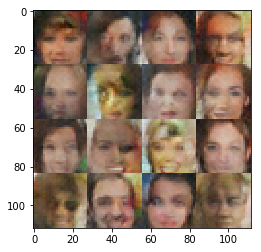

Epoch 1/1...Discriminator Loss: 0.9979......Generator Loss: 0.8558
Epoch 1/1...Discriminator Loss: 1.1020......Generator Loss: 0.6096
Epoch 1/1...Discriminator Loss: 1.1190......Generator Loss: 0.8206
Epoch 1/1...Discriminator Loss: 0.9042......Generator Loss: 0.9994
Epoch 1/1...Discriminator Loss: 1.3042......Generator Loss: 0.7242


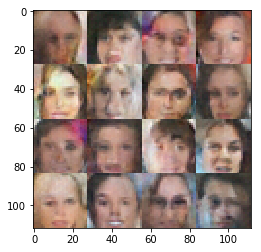

Epoch 1/1...Discriminator Loss: 1.0191......Generator Loss: 1.5313
Epoch 1/1...Discriminator Loss: 1.3469......Generator Loss: 0.4966
Epoch 1/1...Discriminator Loss: 1.8009......Generator Loss: 0.2750
Epoch 1/1...Discriminator Loss: 1.3852......Generator Loss: 0.3893
Epoch 1/1...Discriminator Loss: 1.4468......Generator Loss: 0.6171


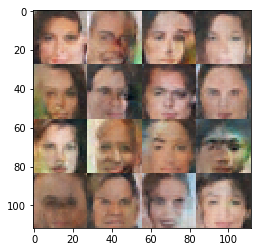

Epoch 1/1...Discriminator Loss: 1.4790......Generator Loss: 0.4451
Epoch 1/1...Discriminator Loss: 1.2659......Generator Loss: 0.5639
Epoch 1/1...Discriminator Loss: 0.9607......Generator Loss: 1.0121
Epoch 1/1...Discriminator Loss: 1.2999......Generator Loss: 0.5076
Epoch 1/1...Discriminator Loss: 1.2376......Generator Loss: 0.5804


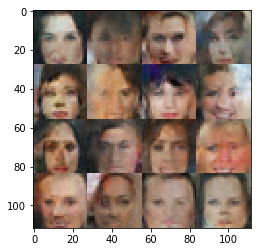

Epoch 1/1...Discriminator Loss: 1.1041......Generator Loss: 0.8590
Epoch 1/1...Discriminator Loss: 0.7947......Generator Loss: 1.0049
Epoch 1/1...Discriminator Loss: 1.0894......Generator Loss: 1.0707
Epoch 1/1...Discriminator Loss: 1.5199......Generator Loss: 1.2832
Epoch 1/1...Discriminator Loss: 1.0894......Generator Loss: 0.7612


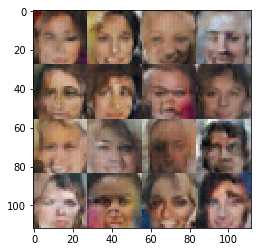

Epoch 1/1...Discriminator Loss: 1.4504......Generator Loss: 0.4701
Epoch 1/1...Discriminator Loss: 1.0283......Generator Loss: 0.9815
Epoch 1/1...Discriminator Loss: 1.1032......Generator Loss: 1.2443
Epoch 1/1...Discriminator Loss: 1.0441......Generator Loss: 0.7173
Epoch 1/1...Discriminator Loss: 1.0574......Generator Loss: 0.7841


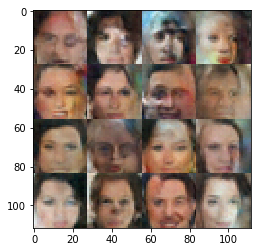

Epoch 1/1...Discriminator Loss: 1.1143......Generator Loss: 0.9870
Epoch 1/1...Discriminator Loss: 1.2902......Generator Loss: 0.4592
Epoch 1/1...Discriminator Loss: 1.3586......Generator Loss: 0.9529
Epoch 1/1...Discriminator Loss: 1.1784......Generator Loss: 1.0478
Epoch 1/1...Discriminator Loss: 1.9075......Generator Loss: 0.2326


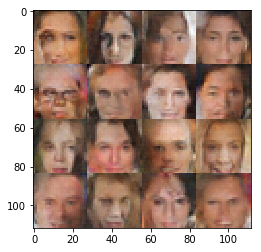

Epoch 1/1...Discriminator Loss: 1.2770......Generator Loss: 1.4025
Epoch 1/1...Discriminator Loss: 1.5426......Generator Loss: 0.3912
Epoch 1/1...Discriminator Loss: 0.9931......Generator Loss: 0.9660
Epoch 1/1...Discriminator Loss: 1.0961......Generator Loss: 0.7237
Epoch 1/1...Discriminator Loss: 1.7327......Generator Loss: 0.9196


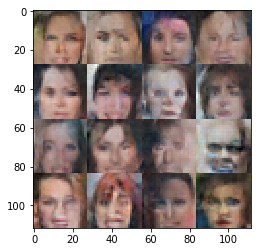

Epoch 1/1...Discriminator Loss: 1.2914......Generator Loss: 1.2658
Epoch 1/1...Discriminator Loss: 1.0729......Generator Loss: 0.7096
Epoch 1/1...Discriminator Loss: 0.8816......Generator Loss: 1.5687
Epoch 1/1...Discriminator Loss: 1.1231......Generator Loss: 0.8009
Epoch 1/1...Discriminator Loss: 1.1519......Generator Loss: 0.6838


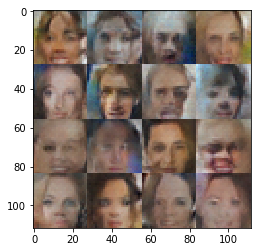

Epoch 1/1...Discriminator Loss: 1.4541......Generator Loss: 0.3873
Epoch 1/1...Discriminator Loss: 1.1372......Generator Loss: 0.6499
Epoch 1/1...Discriminator Loss: 1.7342......Generator Loss: 0.3187
Epoch 1/1...Discriminator Loss: 1.2387......Generator Loss: 0.6431
Epoch 1/1...Discriminator Loss: 1.3703......Generator Loss: 0.4212


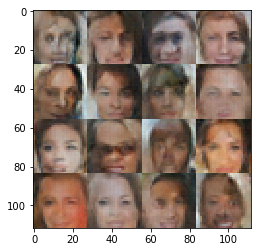

Epoch 1/1...Discriminator Loss: 1.1243......Generator Loss: 0.5296
Epoch 1/1...Discriminator Loss: 1.3178......Generator Loss: 0.8298
Epoch 1/1...Discriminator Loss: 1.3137......Generator Loss: 1.6006
Epoch 1/1...Discriminator Loss: 0.6870......Generator Loss: 1.2308
Epoch 1/1...Discriminator Loss: 1.3526......Generator Loss: 0.4232


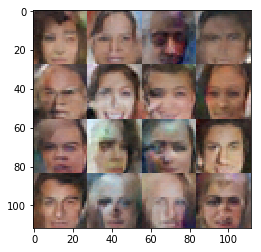

Epoch 1/1...Discriminator Loss: 1.2121......Generator Loss: 0.5179
Epoch 1/1...Discriminator Loss: 1.0305......Generator Loss: 0.8480
Epoch 1/1...Discriminator Loss: 1.1865......Generator Loss: 0.5703
Epoch 1/1...Discriminator Loss: 1.1460......Generator Loss: 1.0636
Epoch 1/1...Discriminator Loss: 1.0212......Generator Loss: 1.0806


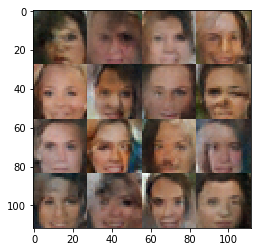

Epoch 1/1...Discriminator Loss: 0.7407......Generator Loss: 1.1782
Epoch 1/1...Discriminator Loss: 1.2345......Generator Loss: 0.8860
Epoch 1/1...Discriminator Loss: 1.2074......Generator Loss: 0.5524
Epoch 1/1...Discriminator Loss: 1.2844......Generator Loss: 1.4871
Epoch 1/1...Discriminator Loss: 1.3525......Generator Loss: 0.5088


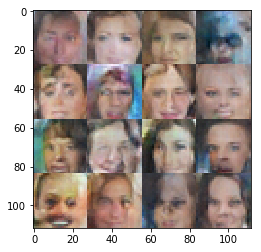

Epoch 1/1...Discriminator Loss: 1.0871......Generator Loss: 0.7054
Epoch 1/1...Discriminator Loss: 1.3259......Generator Loss: 1.0499
Epoch 1/1...Discriminator Loss: 0.8336......Generator Loss: 1.8079
Epoch 1/1...Discriminator Loss: 1.3164......Generator Loss: 0.8171
Epoch 1/1...Discriminator Loss: 1.1978......Generator Loss: 0.5177


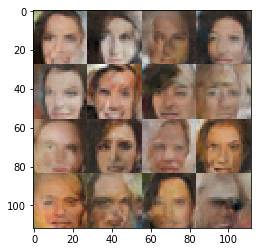

Epoch 1/1...Discriminator Loss: 1.2033......Generator Loss: 0.9257
Epoch 1/1...Discriminator Loss: 1.2807......Generator Loss: 0.9982
Epoch 1/1...Discriminator Loss: 0.9805......Generator Loss: 0.8642
Epoch 1/1...Discriminator Loss: 1.4045......Generator Loss: 0.7527
Epoch 1/1...Discriminator Loss: 0.8689......Generator Loss: 1.4161


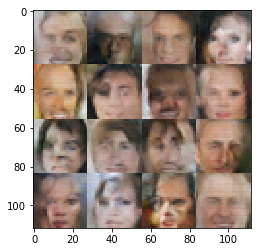

Epoch 1/1...Discriminator Loss: 1.2235......Generator Loss: 0.7711
Epoch 1/1...Discriminator Loss: 0.9570......Generator Loss: 1.3765
Epoch 1/1...Discriminator Loss: 1.5487......Generator Loss: 0.3529
Epoch 1/1...Discriminator Loss: 1.1954......Generator Loss: 0.7752
Epoch 1/1...Discriminator Loss: 1.0201......Generator Loss: 1.3859


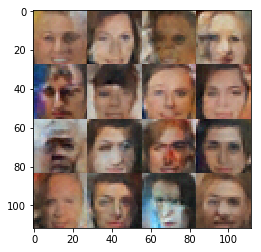

Epoch 1/1...Discriminator Loss: 1.0037......Generator Loss: 1.8422
Epoch 1/1...Discriminator Loss: 1.0996......Generator Loss: 0.9281
Epoch 1/1...Discriminator Loss: 1.0905......Generator Loss: 0.6790
Epoch 1/1...Discriminator Loss: 0.7541......Generator Loss: 1.6287
Epoch 1/1...Discriminator Loss: 1.3594......Generator Loss: 0.6443


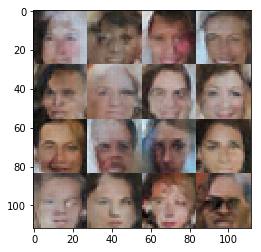

Epoch 1/1...Discriminator Loss: 1.4619......Generator Loss: 0.6282
Epoch 1/1...Discriminator Loss: 1.0787......Generator Loss: 1.0380
Epoch 1/1...Discriminator Loss: 1.0328......Generator Loss: 0.8252
Epoch 1/1...Discriminator Loss: 1.1699......Generator Loss: 0.7380
Epoch 1/1...Discriminator Loss: 1.2430......Generator Loss: 1.6067


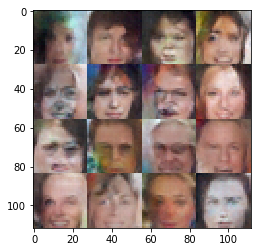

Epoch 1/1...Discriminator Loss: 0.9315......Generator Loss: 1.1273
===========done===========


In [152]:
batch_size = 32
z_dim = 100
learning_rate = 0.002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.